## CLASSIFICATION OF HEART DISEASE USING LOGISTIC REGRESSION MODEL


In [18]:
## Importing Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10.0, 5.0)

In [19]:
## Reading the Dataset 
data = pd.read_csv('data02.csv', encoding='unicode_escape')
print(data.shape)
data.head()

(761, 4)


,Date,Time,Code,Outcome
0,10/10/1989,8:00,58,149
1,10/10/1989,8:00,33,10
2,10/10/1989,12:00,60,116
3,10/10/1989,12:00,33,4
4,10/10/1989,18:00,62,304


## Data Analysis

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     761 non-null    object
 1   Time     761 non-null    object
 2   Code     761 non-null    int64 
 3   Outcome  761 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 23.9+ KB


In [21]:
# Converting Date and Time to Datetime object
data['Date'] = pd.to_datetime(data['Date'], format = '%m/%d/%Y')
data['Time'] = pd.to_datetime(data['Time'], format = '%H:%M')

# Converting the Datetime object to numeric data
data['Date'] = pd.to_numeric(data['Date'])
data['Time'] = pd.to_numeric(data['Time'])

data.head()

,Date,Time,Code,Outcome
0,623980800000000000,-2208960000000000000,58,149
1,623980800000000000,-2208960000000000000,33,10
2,623980800000000000,-2208945600000000000,60,116
3,623980800000000000,-2208945600000000000,33,4
4,623980800000000000,-2208924000000000000,62,304


In [22]:
dataScale = 2*((data - data.min()) / (data.max() - data.min())) - 1    # Feature Scaling from -1 to 1
dataScale['Outcome'] = data['Outcome']                                 # Not applying Scaling on Y

for i in range(len(dataScale)):
    if dataScale['Outcome'][i] <= 120:
        dataScale['Outcome'][i] = 0
    else:
        dataScale['Outcome'][i] = 1
        
data = dataScale
data.head()

C:\Users\abdul\AppData\Local\Temp/ipykernel_14416/3520244917.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataScale['Outcome'][i] = 1
C:\Users\abdul\AppData\Local\Temp/ipykernel_14416/3520244917.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataScale['Outcome'][i] = 0


,Date,Time,Code,Outcome
0,-1.0,-1.000000,0.724138,1
1,-1.0,-1.000000,-1.000000,0
2,-1.0,-0.428571,0.862069,0
3,-1.0,-0.428571,-1.000000,0
4,-1.0,0.428571,1.000000,1


<AxesSubplot:xlabel='Outcome', ylabel='count'>

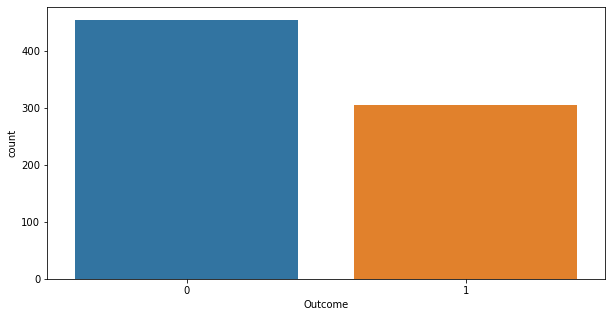

In [23]:
sns.countplot(x = "Outcome", data = data)                       # Plot for analyzing heart disease in the data

<AxesSubplot:xlabel='Outcome', ylabel='count'>

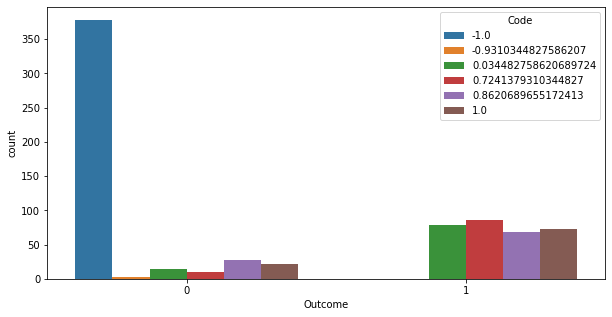

In [27]:
sns.countplot(x = "Outcome", hue = "Code", data = data)        # Plot for analyzing heart disease in males and females

<AxesSubplot:ylabel='Frequency'>

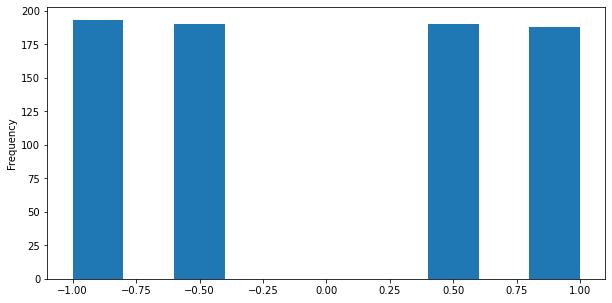

In [31]:
data["Time"].plot.hist()                                              # Plot for analyzing patient's ages in the data

## DATA WRANGLING 

In [32]:
data.isnull().sum()                                                 # To check wether the data contains any null values
#sns.heatmap(data.isnull(), yticklabels = False)

Date       0
Time       0
Code       0
Outcome    0
dtype: int64